In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

pd.set_option('future.no_silent_downcasting', True)

In [2]:
class Model(nn.Module):
    def __init__(self, in_features, H1, H2, out_features):
        super().__init__()
        self.fc1 = nn.Linear(in_features, H1)
        self.fc2 = nn.Linear(H1, H2)
        self.out = nn.Linear(H2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

torch.manual_seed(41)
model = Model(in_features=4, H1=8, H2=8, out_features=3)

In [3]:
# Load data
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
my_df = pd.read_csv(url)

# Convert last column to numbers
my_df['variety'] = my_df['variety'].replace({'Setosa': 0, 'Versicolor': 1, 'Virginica': 2})
my_df['variety'] = my_df['variety'].astype('int64')

# Split data into X and Y
X = my_df.drop('variety', axis=1)
Y = my_df['variety']

# Convert to numpy arrays
X = X.values
Y = Y.values

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=41)


# Convert to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
Y_train = torch.LongTensor(Y_train)
Y_test = torch.LongTensor(Y_test)

Epoch 0, Loss: 1.1318365335464478
Epoch 10, Loss: 0.9658561944961548
Epoch 20, Loss: 0.6789938807487488
Epoch 30, Loss: 0.4004894495010376
Epoch 40, Loss: 0.22509503364562988
Epoch 50, Loss: 0.12207334488630295
Epoch 60, Loss: 0.07481689006090164
Epoch 70, Loss: 0.054512783885002136
Epoch 80, Loss: 0.04437492415308952
Epoch 90, Loss: 0.03837944194674492


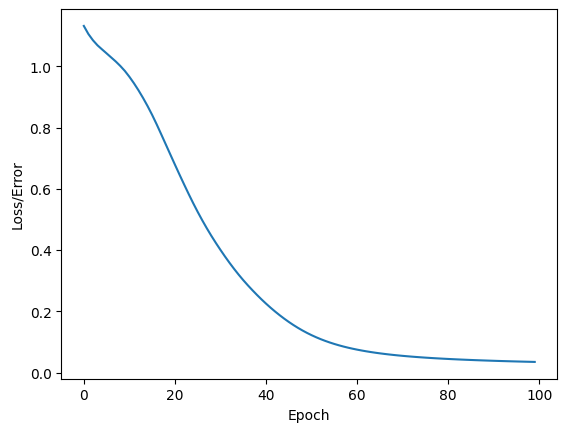

In [4]:
# Define criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train model
losses = []
for i in range(100):
    # Forward pass
    y_pred = model(X_train)
    loss = criterion(y_pred, Y_train)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print loss every 10 epochs
    if i % 10 == 0:
        print(f'Epoch {i}, Loss: {loss.item()}')
    
    # Append loss to list
    losses.append(loss.detach().numpy())

# Plot losses
plt.plot(range(100), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss/Error')
plt.show()

In [5]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss =  criterion(y_eval, Y_test)
    
loss

tensor(0.1458)

In [6]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        
        print(f'{i+1}.) {str(y_val)} \t {Y_test[i]} \t {y_val.argmax().item()}')
        
        if y_val.argmax().item() == Y_test[i]:
            correct += 1
print(f'we got {correct} correct!')

1.) tensor([-7.7212,  1.5826,  4.8685]) 	 2 	 2
2.) tensor([-10.2316,   0.5146,   8.7767]) 	 2 	 2
3.) tensor([-10.7282,   1.1893,   8.2408]) 	 2 	 2
4.) tensor([-4.4743,  3.5419, -1.1241]) 	 1 	 1
5.) tensor([-9.0954,  1.4687,  6.2899]) 	 2 	 2
6.) tensor([-2.2803,  3.7077, -4.1196]) 	 1 	 1
7.) tensor([-7.0740,  2.2070,  3.2966]) 	 2 	 2
8.) tensor([-4.2271,  3.6553, -1.5467]) 	 1 	 1
9.) tensor([-8.0707,  1.8280,  4.7897]) 	 2 	 2
10.) tensor([-10.8583,   0.5051,   9.3761]) 	 2 	 2
11.) tensor([-6.8676,  2.2165,  3.0858]) 	 2 	 2
12.) tensor([  9.4382,   3.2638, -18.8717]) 	 0 	 0
13.) tensor([  8.6037,   2.9307, -17.1502]) 	 0 	 0
14.) tensor([-1.0594,  3.1702, -4.7116]) 	 1 	 1
15.) tensor([  8.0310,   3.2450, -16.7844]) 	 0 	 0
16.) tensor([-6.7105,  2.4191,  2.6637]) 	 2 	 2
17.) tensor([  8.4678,   3.0888, -17.1317]) 	 0 	 0
18.) tensor([-7.6060,  1.7034,  4.5701]) 	 1 	 2
19.) tensor([  9.8628,   3.2141, -19.4757]) 	 0 	 0
20.) tensor([  7.7276,   2.8980, -15.7355]) 	 0 	 0
21